In [38]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
runs=['qkktxg', 'kbkzpy', 'tpfkdp', 'vqlxgl', 'yvdrru', 'bsbwpr', 'frxinx']
date='131121'
group='percentile'
model='Sage'
cases=['vlarge_redshift_0_all', 'vlarge_redshift_50_all', 'vlarge_redshift_75_all', 'vlarge_redshift_85_all',
      'vlarge_redshift_95_all', 'vlarge_redshift_99_all', 'vlarge_all_final']
# pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/results_{group}_{date}/{model}_{case}_{runs}/')

In [41]:
runs=['qkktxg', 'tpfkdp', 'vqlxgl', 'yvdrru', 'bsbwpr', 'frxinx']
date='131121'
group='percentile'
model='Sage'
cases=['vlarge_redshift_0_all', 'vlarge_redshift_75_all', 'vlarge_redshift_85_all',
      'vlarge_redshift_95_all', 'vlarge_redshift_99_all', 'vlarge_all_final']

In [72]:
lows=[]
scatter=[]
ms, sigscatter = [], []
ml, siglow =[],[]
pred = [], [], [], []
for run, case in zip(runs, cases):
#     try:
        pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/results_{group}_{date}/{model}_{case}_{run}')    
        dic=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
        lows.append([dic['low']])
        ml.append(np.mean(dic['low']))
        siglow.append(np.std(dic['low']))
        ms.append(np.mean(dic['sigma']))
        sigscatter.append(np.std(dic['sigma']))
        scatter.append(dic['sigma'])
        pred.append(dic['pred'])
        
#     except:
#         continue
# ml, siglow, ms, sigscatter

In [85]:
ys=np.array(dic['ys'][0])
xs=np.array(dic['xs'][0])[:,0,:]
Mh=np.array(dic['Mh'][0])
np.shape(ys), np.shape(xs) , np.shape(Mh)

((21739,), (21739, 43), (21739,))

In [43]:
percentiles=np.array([0,75,85,95,99,100])
ml, siglow, ms, sigscatter, percentiles

([0.095673315, 0.101577364, 0.10837362, 0.120074734, 0.13807212, 0.139635],
 [0.002253035,
  0.0010712853,
  0.0010189854,
  0.00092406326,
  0.00069538894,
  0.000728432],
 [0.09706069, 0.10423517, 0.11147778, 0.12395754, 0.14484681, 0.14069651],
 [0.0019289172,
  0.0018407475,
  0.0019444862,
  0.0015146887,
  0.0017399132,
  0.0010822252],
 array([  0,  75,  85,  95,  99, 100]))

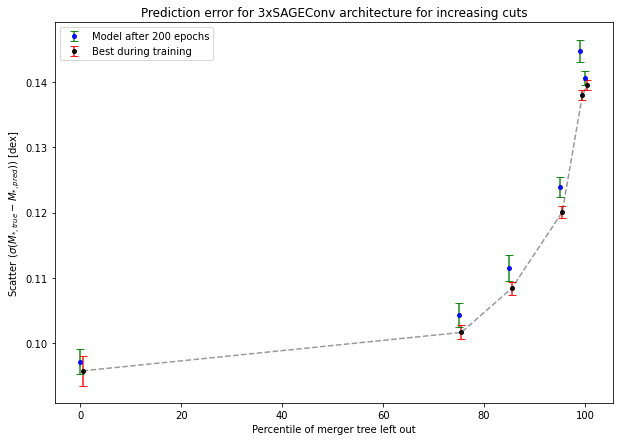

In [53]:
fig, ax =plt.subplots(figsize=(10,7))
ax.errorbar(percentiles,ms, yerr=sigscatter, color='b', fmt='.',markersize=8, 
            capsize=4, ecolor='g', alpha=0.9, label='Model after 200 epochs')
ax.errorbar(percentiles+0.5, ml, yerr=siglow, color='k', fmt='.', markersize=8,
            capsize=4, ecolor='r', alpha=0.9, label='Best during training')
ax.plot(percentiles+0.5, ml, 'k--', alpha=0.4)
ax.set(xlabel='Percentile of merger tree left out', ylabel=r'Scatter ($\sigma (M_{*,true}-M_{*,pred})$) [dex]')
ax.set(title='Prediction error for 3xSAGEConv architecture for increasing cuts')
ax.legend()

In [113]:
nbins=20
k=0
edges=np.percentile(Mh, np.linspace(0,100,nbins))
centers=(edges[:-1]+edges[1:])/2
sigM=[]
ysigs, predsigs = [], []
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<=Mh,edges[i+1]>=Mh)
    ysigs.append(np.std(ys[mask]))
    predsigs.append(np.std(pred[k][mask]))

In [114]:
edges, centers

(array([1.10737813, 1.12525499, 1.14459598, 1.16593647, 1.18927855,
        1.21370351, 1.24145591, 1.26946545, 1.30205178, 1.33349228,
        1.37001348, 1.41465044, 1.46151423, 1.517086  , 1.57970786,
        1.65083449, 1.74703301, 1.90546644, 2.15323964, 5.19933748]),
 array([1.11631656, 1.13492548, 1.15526623, 1.17760751, 1.20149103,
        1.22757971, 1.25546068, 1.28575861, 1.31777203, 1.35175288,
        1.39233196, 1.43808234, 1.48930012, 1.54839693, 1.61527117,
        1.69893375, 1.82624972, 2.02935304, 3.67628856]))

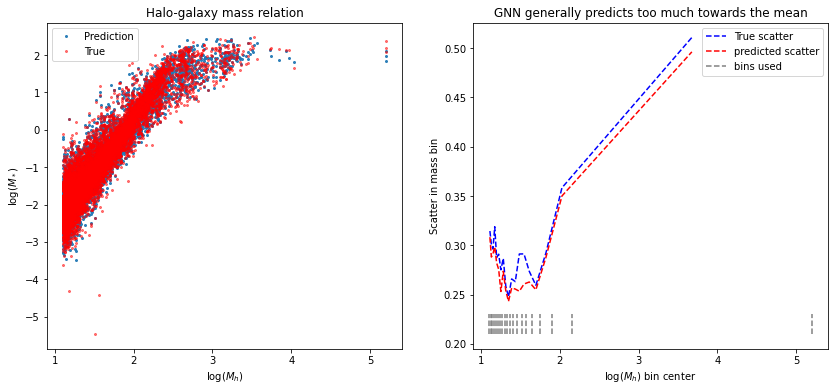

In [140]:
fig, ax =plt.subplots(ncols=2,nrows=1, figsize=(14,6))
ax=ax.flatten()
ax[0].plot(Mh, pred[0],'o', markersize=2, alpha=0.9, label='Prediction')
ax[0].plot(Mh, ys,'ro', markersize=2, alpha=0.5, label='True')
ax[0].set(xlabel=r'log($M_h$)', ylabel=r'log($M_*$)', title='Halo-galaxy mass relation')
ax[0].legend()
ax[1].vlines(edges, 0.21, 0.23, color='gray', linestyle='--', label='bins used')
ax[1].plot(centers, ysigs, 'b--', label='True scatter')
ax[1].plot(centers, predsigs, 'r--', label='predicted scatter')
ax[1].set(xlabel=r'log($M_h$) bin center', ylabel=r'Scatter in mass bin', title='GNN generally predicts too much towards the mean')
ax[1].legend()